# Generating train, validation and test sets with similar class label distributions

## Module imports

In [19]:
import sys
import os
import glob

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
# sns.set_theme()

# cyberpunk theme
#import mplcyberpunk
#plt.style.use('cyberpunk')

import numpy as np
from scipy.stats import entropy

from sklearn.model_selection import train_test_split


# project-specific custom functions
## export the path to custom modules
sys.path.append("../functions")
## import functions
def import_image_files(n_images=16488):
    if os.name == "nt":
        img_files = glob.glob("..\\data\\train_features\\*.jpg")
    else:
        img_files = glob.glob("../data/train_features/*.jpg")
    image_list = []
    for file in img_files[0:n_images]:
        image_list.append(cv.imread(file))
    return image_list

def import_images_from_file_list(file_list):
    image_list = []
    for file in file_list:
        image_list.append(cv.imread(file))
    return image_list

## Data import

In [20]:
dir_data_relative = "../data/"  # the relative directory path to all data files

### label information
df__labels = pd.read_csv(dir_data_relative+"train_labels.csv")

In [21]:
# read data from single file
df = pd.read_csv(dir_data_relative+"data_info__all.csv")
df.head()

,id,filepath,site,shape,height,width,N_channels,aspect_ratio,animal_label,antelope_duiker,bird,blank,civet_genet,hog,leopard,monkey_prosimian,rodent
0,ZJ000000,train_features/ZJ000000.jpg,S0120,"(540, 960, 3)",540,960,3,1.777778,bird,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ZJ000001,train_features/ZJ000001.jpg,S0069,"(540, 960, 3)",540,960,3,1.777778,monkey_prosimian,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,ZJ000002,train_features/ZJ000002.jpg,S0009,"(360, 640, 3)",360,640,3,1.777778,bird,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ZJ000003,train_features/ZJ000003.jpg,S0008,"(360, 640, 3)",360,640,3,1.777778,monkey_prosimian,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,ZJ000004,train_features/ZJ000004.jpg,S0036,"(335, 640, 3)",335,640,3,1.910448,leopard,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## EDA

In [22]:
# return animal label counts per site
df.groupby(by="site")["animal_label"].value_counts()

site   animal_label    
S0001  leopard             51
       monkey_prosimian    17
       bird                11
       blank                6
S0002  monkey_prosimian    68
                           ..
S0197  blank                4
       antelope_duiker      3
S0198  monkey_prosimian     8
       blank                8
       antelope_duiker      7
Name: count, Length: 624, dtype: int64

In [23]:
# return the number of unique sites
df.site.nunique()

148

In [24]:
# plot animal distribution per site
# sns.countplot(data=df, x="site", hue="animal_label")

<Axes: xlabel='site'>

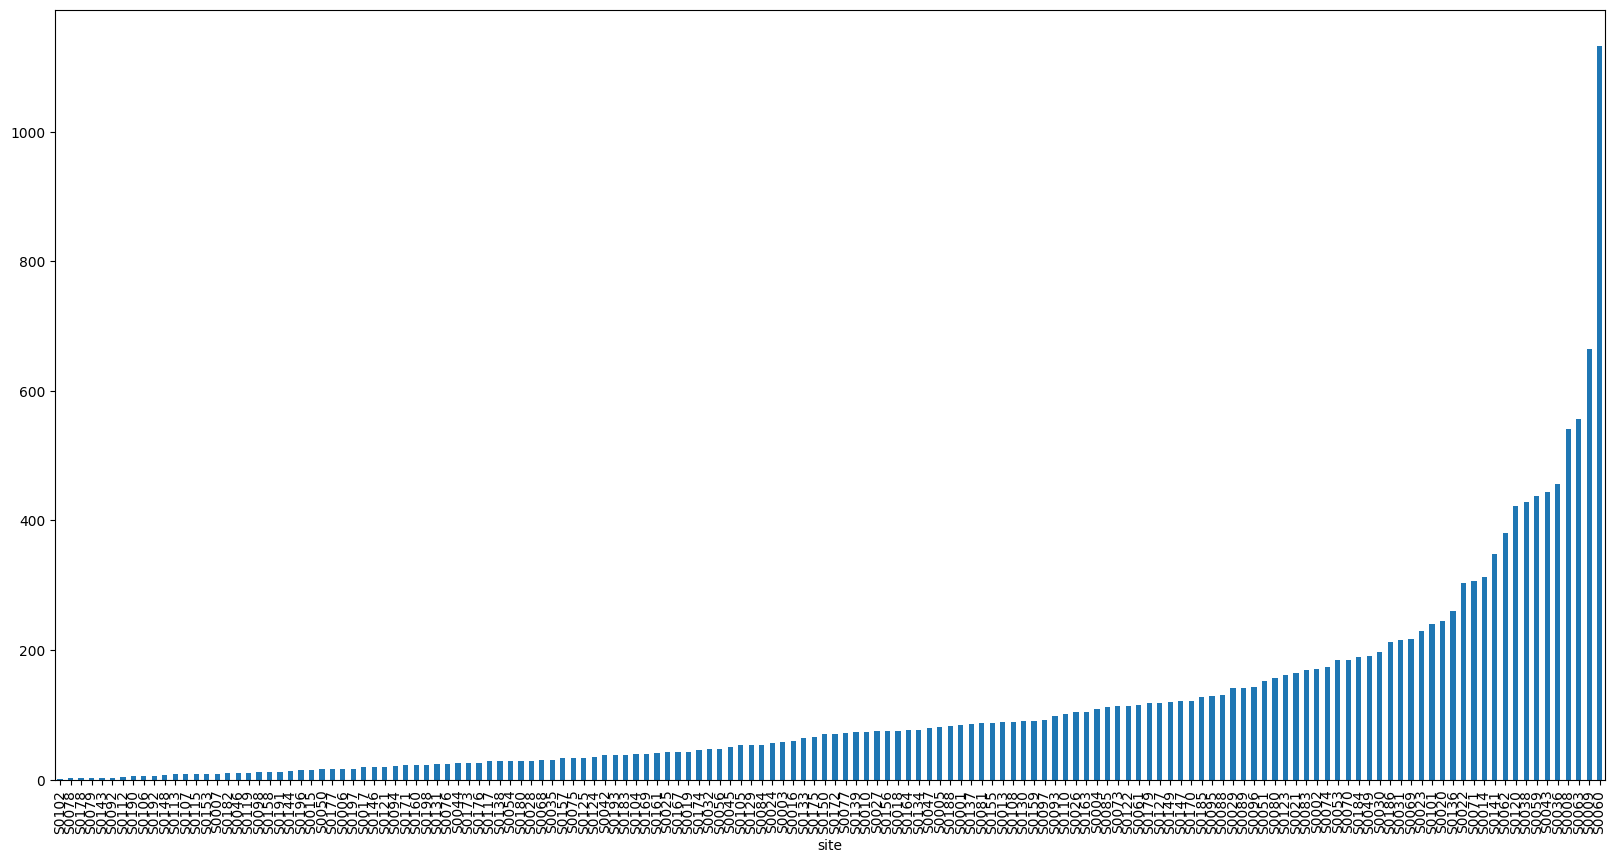

In [25]:
# plot the overall site distribution
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
df["site"].value_counts().sort_values().plot(kind="bar", ax=ax)

In [26]:
# # Plot animal distribution for each site

# m = df.site.nunique()

# for i, site in enumerate(df.site.unique()[:m]):
#     fig, ax = plt.subplots(1, 1)
#     sns.countplot(data=df[df["site"]==site], x="site", hue="animal_label", ax=ax)

In [27]:
df.animal_label.value_counts()

animal_label
monkey_prosimian    2492
antelope_duiker     2474
civet_genet         2423
leopard             2254
blank               2213
rodent              2013
bird                1641
hog                  978
Name: count, dtype: int64

In [28]:
sites_unique = df.site.unique()
N_sites_unique = sites_unique.shape[0]
sites_unique

array(['S0120', 'S0069', 'S0009', 'S0008', 'S0036', 'S0019', 'S0060',
       'S0047', 'S0083', 'S0059', 'S0076', 'S0014', 'S0080', 'S0061',
       'S0075', 'S0003', 'S0105', 'S0188', 'S0097', 'S0068', 'S0077',
       'S0038', 'S0049', 'S0170', 'S0063', 'S0071', 'S0062', 'S0073',
       'S0070', 'S0053', 'S0171', 'S0134', 'S0022', 'S0089', 'S0025',
       'S0042', 'S0021', 'S0184', 'S0027', 'S0026', 'S0004', 'S0024',
       'S0035', 'S0018', 'S0081', 'S0125', 'S0110', 'S0127', 'S0159',
       'S0051', 'S0112', 'S0108', 'S0074', 'S0157', 'S0155', 'S0122',
       'S0095', 'S0123', 'S0001', 'S0023', 'S0149', 'S0185', 'S0043',
       'S0088', 'S0130', 'S0186', 'S0124', 'S0031', 'S0046', 'S0136',
       'S0174', 'S0056', 'S0013', 'S0020', 'S0005', 'S0030', 'S0158',
       'S0156', 'S0016', 'S0084', 'S0179', 'S0096', 'S0137', 'S0163',
       'S0121', 'S0029', 'S0153', 'S0002', 'S0144', 'S0032', 'S0147',
       'S0104', 'S0175', 'S0176', 'S0050', 'S0093', 'S0133', 'S0146',
       'S0150', 'S01

In [29]:
print(np.random.choice(sites_unique, size=10, replace=False))
print(sites_unique.shape)

['S0085' 'S0174' 'S0102' 'S0020' 'S0062' 'S0101' 'S0155' 'S0022' 'S0042'
 'S0059']
(148,)


## Generate similar animal distributions for dataset containing disjoint site sets via the Kullback-Leibler divergence

### Generate the site lists

In [30]:
# run N_run site distribution experiments and check for the lowest reached maximum pairwise entropy

## initialize used lists
entropies__test_train = []
entropies__test_val = []
entropies__val_train = []
sites_KB_train = []
sites_KB_val = []
sites_KB_test = []

## set the number of runs
# N_runs = 1000
# N_runs = 10000  # done, takes 30 min ?
N_runs = 100000

for i in range(N_runs):

    n_run = i  # current run count
    run_percentage = n_run/N_runs  # current percentage of runs (done + in progress)
    if not n_run%int(N_runs/10):
    # if not run_percentage%
        print(f"Run {n_run} of {N_runs}")

    fraction_test = 0  # initialize variable storing the test set fraction
    fraction_val = 0  # initialize variable storing the test set fraction
    fraction_threshold = 0.1  # set the fraction threshold up to which sites are assigned to validation and test sets

    # initialize lists for storing lists of sites assigned to the individual data sets
    sites_train = sites_unique.copy().tolist()
    sites_val = []
    sites_test = []

    N_data = df.shape[0]  # total number of data instances

    # Sampling the test set
    while fraction_test<fraction_threshold:
        # sample from sites (excluding previously sampled sites)
        site_sample = np.random.choice(sites_train, size=1, replace=False)[0]
        # print(f"site sample: {site_sample}")
        sites_train.remove(site_sample)
        # print(f"sites_train: {sites_train}")
        # add corresponding data instances to the set
        sites_test.append(site_sample)
        # print(f"sites_test: {sites_test}")
        # update fraction_test
        N_test = df.query("site in @sites_test").shape[0]  # Number of data instance in the current test set
        fraction_test = N_test/N_data
    
    ## Sampling the test set
    while fraction_val<fraction_threshold:
        # sample from sites (excluding previously sampled sites)
        site_sample = np.random.choice(sites_train, size=1, replace=False)[0]
        # print(f"site sample: {site_sample}")
        sites_train.remove(site_sample)
        # print(f"sites_train: {sites_train}")
        # add corresponding data instances to the set
        sites_val.append(site_sample)
        # print(f"sites_test: {sites_test}")
        # update fraction_val
        N_val = df.query("site in @sites_val").shape[0]  # Number of data instance in the current validation set
        fraction_val = N_val/N_data

    sites_train = np.array(sites_train)
    sites_val = np.array(sites_val)
    sites_test = np.array(sites_test)


    ## create the actual data sets from the generated site attribution lists
    X_train = df.query("site in @sites_train")
    X_val = df.query("site in @sites_val")
    X_test = df.query("site in @sites_test")

    ## generate the distributions by summing the one-hot encoded categorical data along the columns
    dist_train = X_train.iloc[:, 9:].sum(axis=0).to_numpy()
    dist_val = X_val.iloc[:, 9:].sum(axis=0).to_numpy()
    dist_test = X_test.iloc[:, 9:].sum(axis=0).to_numpy()

    ## normalize the distributions (actually not necessary, because the entropy function does in internally)
    dist_train_normalized = dist_train/dist_train.sum()
    dist_val_normalized = dist_val/dist_val.sum()
    dist_test_normalized = dist_test/dist_test.sum()

    ## calculate the pairwise entropies for all data set pairs
    entropy_temp__test_train = entropy(dist_test_normalized, dist_train_normalized, axis=0)
    entropy_temp__test_val = entropy(dist_test_normalized, dist_val_normalized, axis=0)
    entropy_temp__val_train = entropy(dist_val_normalized, dist_train_normalized, axis=0)

    ## append the calculated entropies to the corresponding lists
    entropies__test_train.append(entropy_temp__test_train)
    entropies__test_val.append(entropy_temp__test_val)
    entropies__val_train.append(entropy_temp__val_train)

    ## append the corresponding sites to the lists
    sites_KB_train.append(sites_train)
    sites_KB_val.append(sites_val)
    sites_KB_test.append(sites_test)


Run 0 of 100000
Run 10000 of 100000
Run 20000 of 100000
Run 30000 of 100000
Run 40000 of 100000
Run 50000 of 100000
Run 60000 of 100000
Run 70000 of 100000
Run 80000 of 100000
Run 90000 of 100000


In [31]:
# extract the site combinations with minimum maximum entropy
max_entropies = []
for tup in zip(entropies__test_train, entropies__test_val, entropies__val_train):
    # print(tup)
    max_entropies.append(max(tup))

idx_min_max_entropy = np.argmin(max_entropies)

## get the arrays
sites_KB_train__min_entropy = sites_KB_train[idx_min_max_entropy]
sites_KB_val__min_entropy = sites_KB_val[idx_min_max_entropy]
sites_KB_test__min_entropy = sites_KB_test[idx_min_max_entropy]

## create Series
sites_KB_train__min_entropy__Series = pd.Series(sites_KB_train__min_entropy)
sites_KB_val__min_entropy__Series = pd.Series(sites_KB_val__min_entropy)
sites_KB_test__min_entropy__Series = pd.Series(sites_KB_test__min_entropy)

In [32]:
# print the minimum maximum entropy value achieved
print("Minimum maximum entropy:", round(max_entropies[idx_min_max_entropy], 4))

Minimum maximum entropy: 0.0209


In [33]:
# Generate the train, validation and test dataset info DataFrames

df_train = df.query("site in @sites_KB_train__min_entropy")
df_val = df.query("site in @sites_KB_val__min_entropy")
df_test = df.query("site in @sites_KB_test__min_entropy")

In [35]:
# save all results

dir_output_relative = "../data/"  # the relative directory path to all data files

sites_KB_train__min_entropy__Series.to_csv(dir_output_relative+f"sites_KB_train__min_entropy__{N_runs}_runs.csv", index=False, header=None)
sites_KB_val__min_entropy__Series.to_csv(dir_output_relative+f"sites_KB_val__min_entropy__{N_runs}_runs.csv", index=False, header=None)
sites_KB_test__min_entropy__Series.to_csv(dir_output_relative+f"sites_KB_test__min_entropy__{N_runs}_runs.csv", index=False, header=None)

df_train.to_csv(dir_output_relative+f"train_dataset_info__{N_runs}_runs.csv", index=False)
df_val.to_csv(dir_output_relative+f"val_dataset_info__{N_runs}_runs.csv", index=False)
df_test.to_csv(dir_output_relative+f"test_dataset_info__{N_runs}_runs.csv", index=False)

In [36]:
# check the dataset fractions

print(f"Train set fraction: {df_train.shape[0]/N_data:.4f}")
print(f"Validation set fraction: {df_val.shape[0]/N_data:.4f}")
print(f"Test set fraction: {df_test.shape[0]/N_data:.4f}")

Train set fraction: 0.7956
Validation set fraction: 0.1041
Test set fraction: 0.1003


/var/folders/vp/mh2_0sxn02z5xspn2r6hp18m0000gn/T/ipykernel_4568/2911387782.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


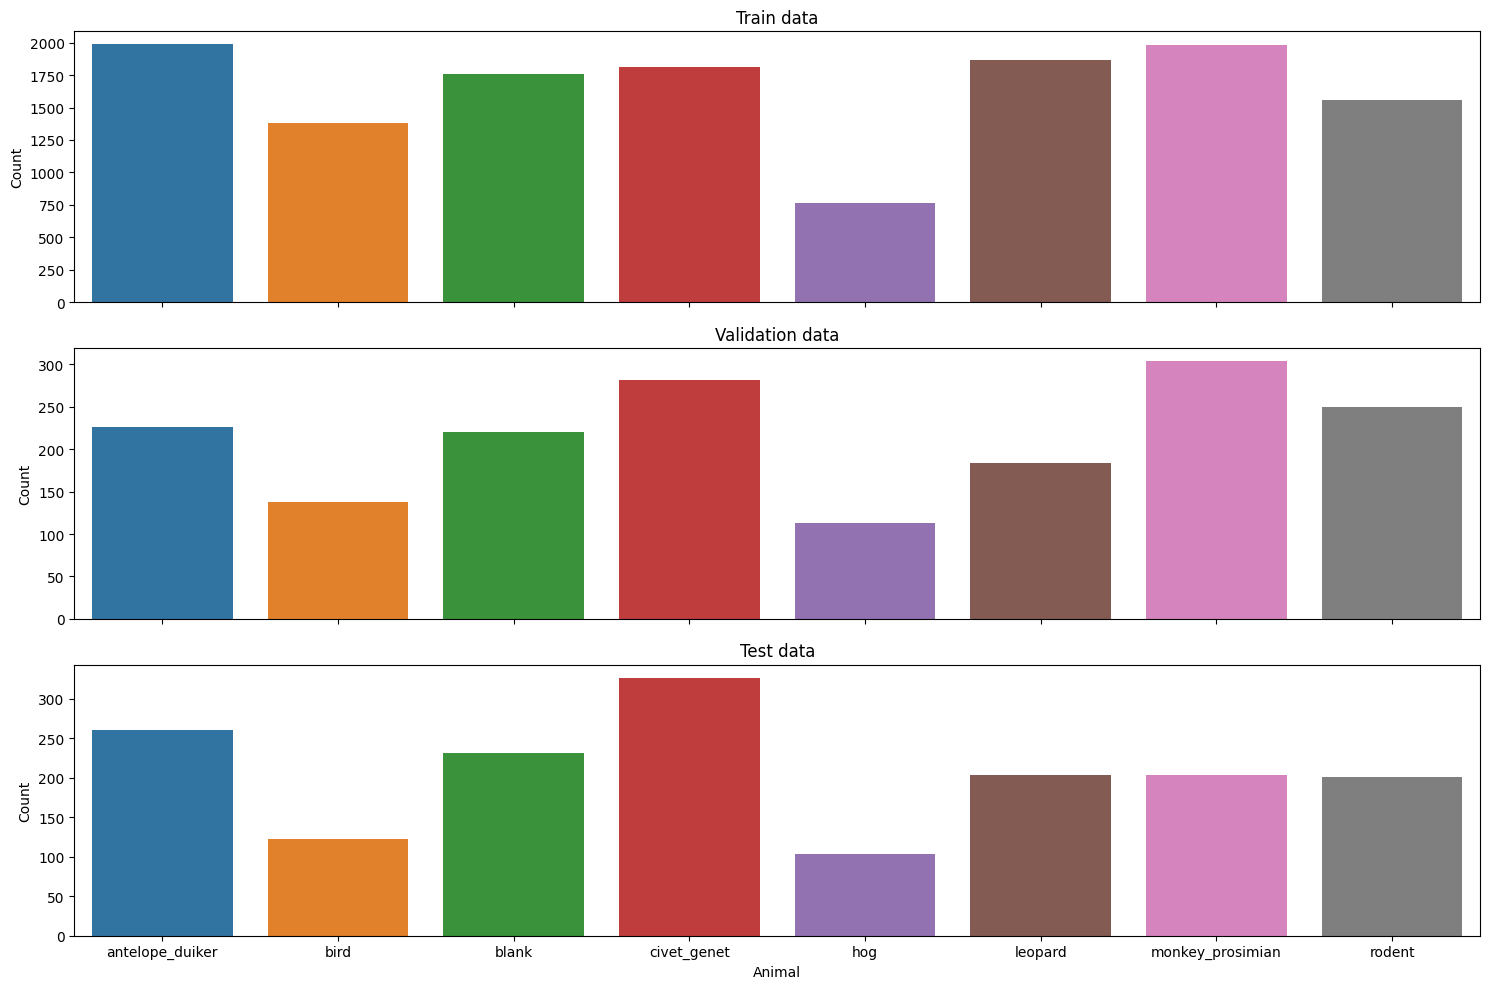

In [37]:
# plot the distributions for visual comparison

fig, ax = plt.subplots(3, 1, figsize=(15, 10), sharex=True)

sns.countplot(data=df_train.sort_values(by='animal_label'), x="animal_label", ax=ax[0])
sns.countplot(data=df_val.sort_values(by='animal_label'), x="animal_label", ax=ax[1])
sns.countplot(data=df_test.sort_values(by='animal_label'), x="animal_label", ax=ax[2])

ax[0].set(title="Train data",
          xlabel="",
          ylabel="Count")
ax[1].set(title="Validation data",
          xlabel="",
          ylabel="Count")
ax[2].set(title="Test data",
          xlabel="Animal",
          ylabel="Count")

fig.tight_layout()
fig.show()
fig.savefig(dir_output_relative+f"distribution_comparison__{N_runs}_runs.png", dpi=300)